# EDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Load Data

In [2]:
train = pd.read_csv("train.csv",index_col = "Id")
print(train.shape)
print(train.columns)

(1460, 80)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Paved

In [3]:
# Change Year and Month to categorical variables
train[['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold']] = \
    train[['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold']].astype("category")

In [4]:
train.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1946,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,651,651,GasA,Gd,Y,SBrkr,707,682,0,1389,0,0,1,1,3,1,TA,6,Typ,2,Gd,Detchd,1947.0,Unf,1,240,TA,TA,P,0,0,126,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,135000
380,60,RL,60.0,8123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,982,982,GasA,Ex,Y,SBrkr,1007,793,0,1800,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2000.0,Fin,2,463,TA,TA,Y,100,63,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,179000
1073,50,RL,50.0,7585,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1.5Fin,5,3,1948,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Fa,Fa,Mn,Unf,0,Unf,0,810,810,GasA,Fa,Y,FuseA,1002,454,0,1456,1,1,1,0,4,1,TA,7,Typ,1,TA,Detchd,1954.0,Unf,1,280,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,91500
1285,50,RL,50.0,9638,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,6,7,1919,1990,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,804,804,GasA,Ex,Y,SBrkr,1699,748,0,2447,0,0,2,0,4,1,Gd,10,Min2,1,Gd,Detchd,1969.0,Unf,1,336,TA,TA,Y,272,0,42,0,116,0,NaN,NaN,NaN,0,3,2010,WD,Normal,169000
179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
559,60,RL,57.0,21872,Pave,NaN,IR2,HLS,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,604,Unf,0,125,729,GasA,Ex,Y,SBrkr,729,717,0,1446,0,1,2,1,3,1,TA,6,Typ,1,TA,Attchd,1996.0,Unf,2,406,TA,TA,Y,264,22,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,175000
346,50,RL,65.0,6435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,972,972,GasA,Gd,Y,SBrkr,972,605,0,1577,0,0,1,0,3,1,Fa,6,Typ,1,Gd,Detchd,1939.0,Unf,1,312,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,140200
1289,120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2000,2000,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1158,Unf,0,343,1501,GasA,Ex,Y,SBrkr,1659,0,0,1659,1,0,2,0,2,1,Ex,5,Typ,1,Ex,Attchd,2000.0,Fin,2,499,TA,TA,Y,212,59,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,278000


## Target Variable: Sale Price

Text(0.5, 1.0, 'Density plot Logged Sale Price')

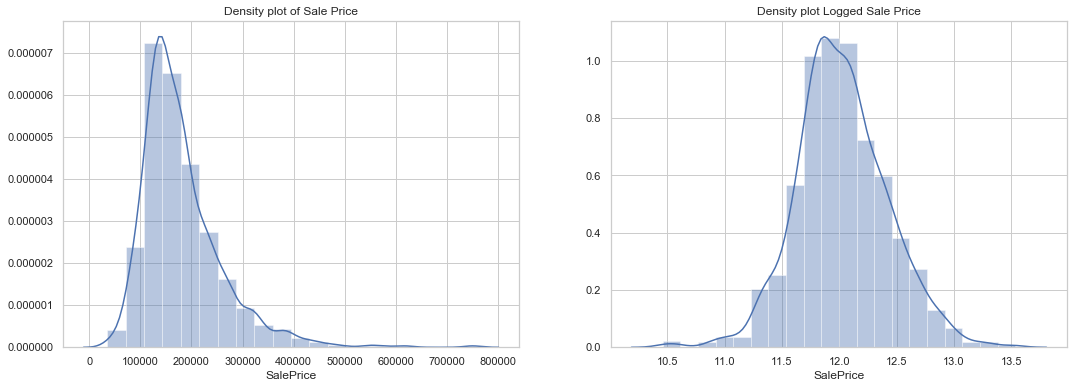

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(train["SalePrice"],bins=20, ax= ax[0])
ax[0].set_title("Density plot of Sale Price")

# To make the distribution of the target variable normal, I applied the log transformation.
lsalesprice = train["SalePrice"].apply(np.log)
sns.distplot(lsalesprice, bins = 20, ax= ax[1])
ax[1].set_title("Density plot Logged Sale Price")

## 10 critical factors in house value based upon research

* Peer-reviewed scholarly journal: https://link.springer.com/article/10.1007/s11146-006-9983-5<br>
* Opendoor blog post: https://www.opendoor.com/w/blog/factors-that-influence-home-value 


The Below are the lists of features related to each of the critical factors 

* Sq-Foot : BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF WoodDeckSF OpenPorchSF GrLivArea EnclosedPorch 3SsnPorch ScreenPorch MasVnrArea
* Lot Size: LotFrontage LotArea LotShape LotConfig
* Age: YearBuilt YrSold
* Bed and Bathroom: BedroomAbvGr BsmtFullBath BsmtHalfBath FullBath HalfBath TotRmsAbvGrd
* Garage: GarageType GarageFinish GarageYrBlt GarageCars GarageArea GarageQual GarageCond
* Pools: PoolArea PoolQC
* Fireplace: Fireplaces FireplaceQu
* Air-conditioning: CentralAir
* Upgrades/updates: YearRemodAdd
* Neighborhood/Location: Neighborhood

In [6]:
# Important features included in 10 most critical factors listed above
imp_cols = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","WoodDeckSF",
            "OpenPorchSF","GrLivArea","EnclosedPorch","3SsnPorch","ScreenPorch","MasVnrArea","LotFrontage",
            "LotArea","LotShape","LotConfig","YearBuilt","YrSold","BedroomAbvGr","BsmtFullBath","BsmtHalfBath",
            "FullBath","HalfBath","TotRmsAbvGrd","GarageType","GarageFinish","GarageYrBlt","GarageCars","GarageArea",
            "GarageQual","GarageCond","PoolArea","PoolQC","Fireplaces","FireplaceQu","CentralAir","YearRemodAdd",
            "Neighborhood"]

In [7]:
# Descriptive Statistics of the numerical features from the list of critical factors
train[imp_cols].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,GrLivArea,EnclosedPorch,3SsnPorch,ScreenPorch,MasVnrArea,LotFrontage,LotArea,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,PoolArea,Fireplaces
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,94.244521,46.660274,1515.463699,21.954110,3.409589,15.060959,103.685262,70.049958,10516.828082,2.866438,0.425342,0.057534,1.565068,0.382877,6.517808,1978.506164,1.767123,472.980137,2.758904,0.613014
std,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,125.338794,66.256028,525.480383,61.119149,29.317331,55.757415,181.066207,24.284752,9981.264932,0.815778,0.518911,0.238753,0.550916,0.502885,1.625393,24.689725,0.747315,213.804841,40.177307,0.644666
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,0.000000,0.000000,59.000000,7553.500000,2.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1961.000000,1.000000,334.500000,0.000000,0.000000
50%,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,0.000000,25.000000,1464.000000,0.000000,0.000000,0.000000,0.000000,69.000000,9478.500000,3.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1980.000000,2.000000,480.000000,0.000000,1.000000
75%,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,168.000000,68.000000,1776.750000,0.000000,0.000000,0.000000,166.000000,80.000000,11601.500000,3.000000,1.000000,0.000000,2.000000,1.000000,7.000000,2002.000000,2.000000,576.000000,0.000000,1.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,857.000000,547.000000,5642.000000,552.000000,508.000000,480.000000,1600.000000,313.000000,215245.000000,8.000000,3.000000,2.000000,3.000000,2.000000,14.000000,2010.000000,4.000000,1418.000000,738.000000,3.000000


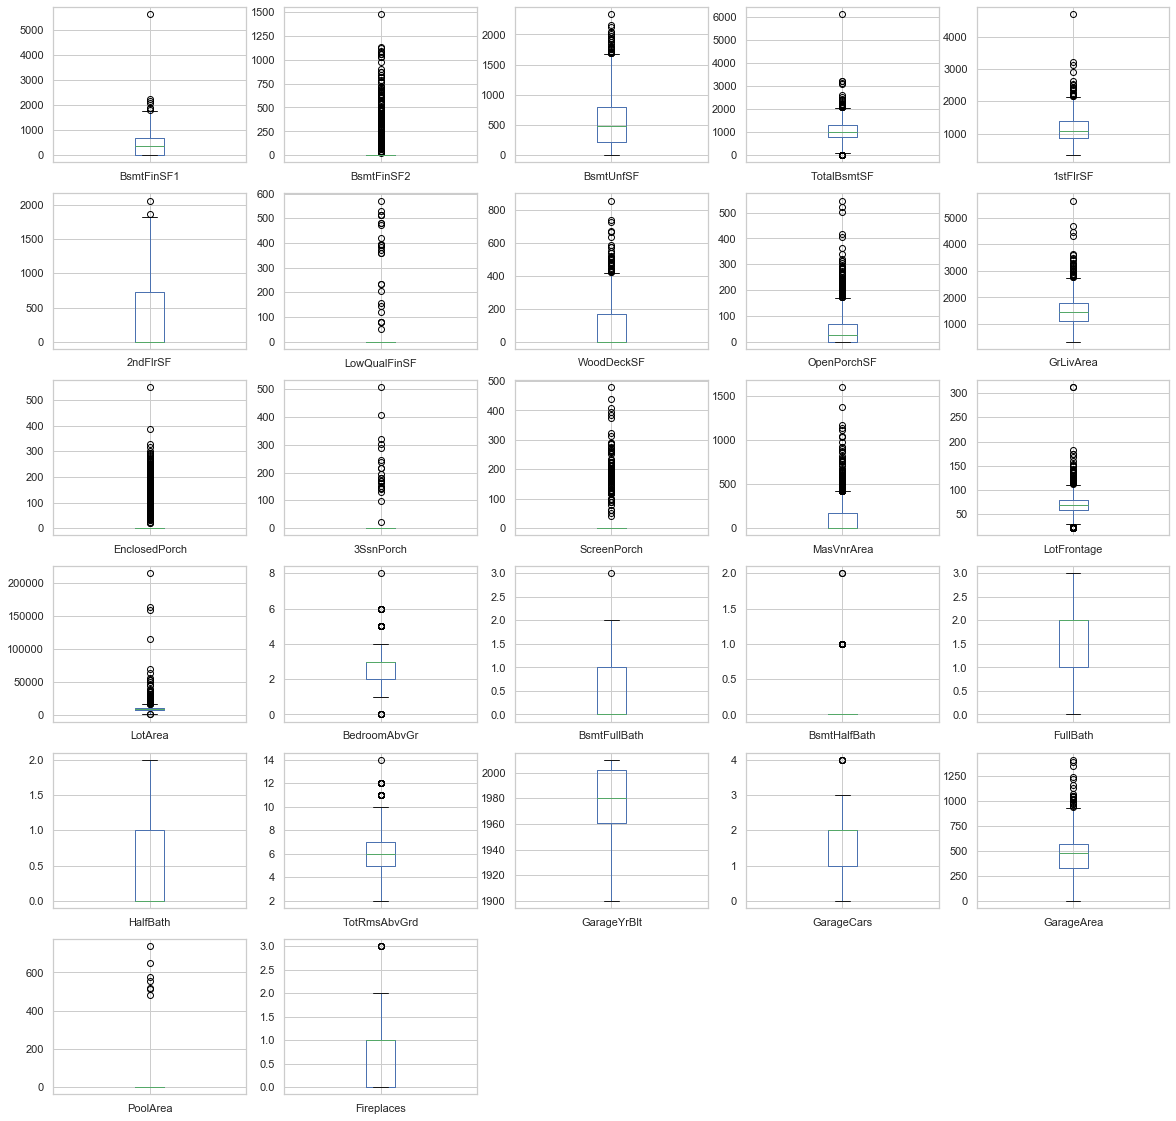

In [8]:
# Boxplots of the numerical features from the list of critical factors
train[imp_cols].plot(kind = "box", subplots = True, sharex = False, sharey = False, layout = (6,5), figsize=(20,20));

In [9]:
# Categorical features among the critical Factors 
cat_imp_cols = train[imp_cols].select_dtypes(["object","category"]).columns.tolist()

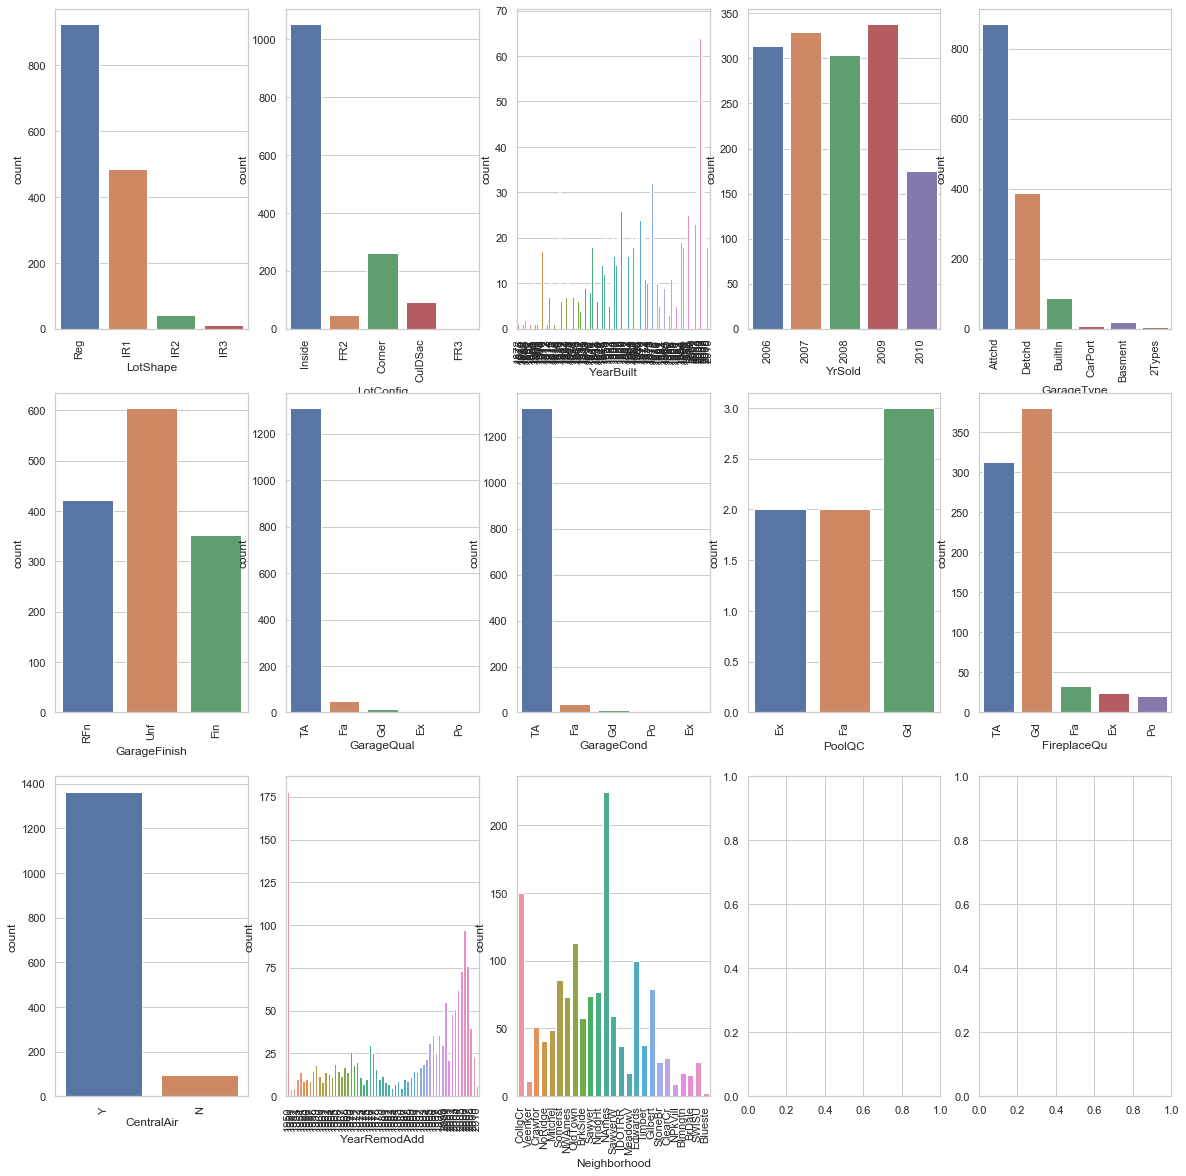

In [10]:
# Countplots of the categorical features from the list of critical factors
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for col, subplot in zip(cat_imp_cols, ax.flatten()):
    sns.countplot(train[col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [11]:
# In 2010, samples were only collected till July
train[train['YrSold'] == 2010].groupby('MoSold')['YrSold'].size()

MoSold
1     10
2     15
3     21
4     39
5     48
6     36
7      6
8      0
9      0
10     0
11     0
12     0
Name: YrSold, dtype: int64

## Features that are not from the 10 critical factors

In [12]:
# Features that are not included in the 10 most critical factors
unimp_cols = [col for col in train.columns.tolist() if col not in imp_cols]
unimp_cols = unimp_cols[:-1] #exclude SalePrice
unimp_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

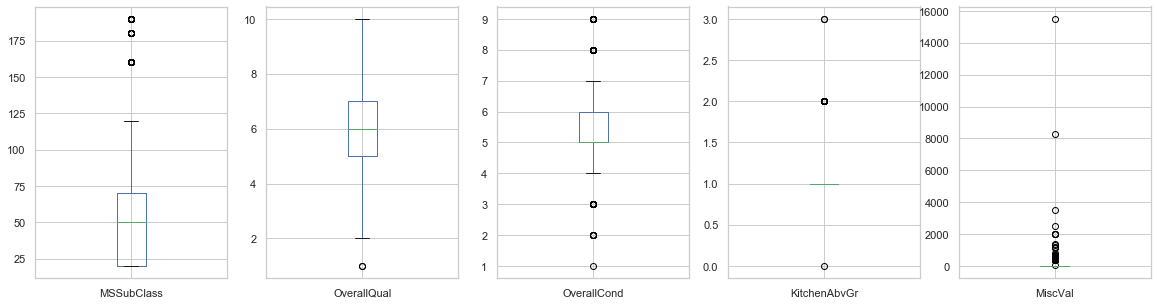

In [13]:
# Boxplots of the numerical features from the list of non-critical factors
train[unimp_cols].plot(kind = "box", subplots = True, sharex = False, sharey = False, 
                       layout = (1,5), figsize=(20,5));

In [14]:
# Categorical features among the non-critical Factors 
cat_unimp_cols = train[unimp_cols].select_dtypes(["object","category"]).columns.tolist()

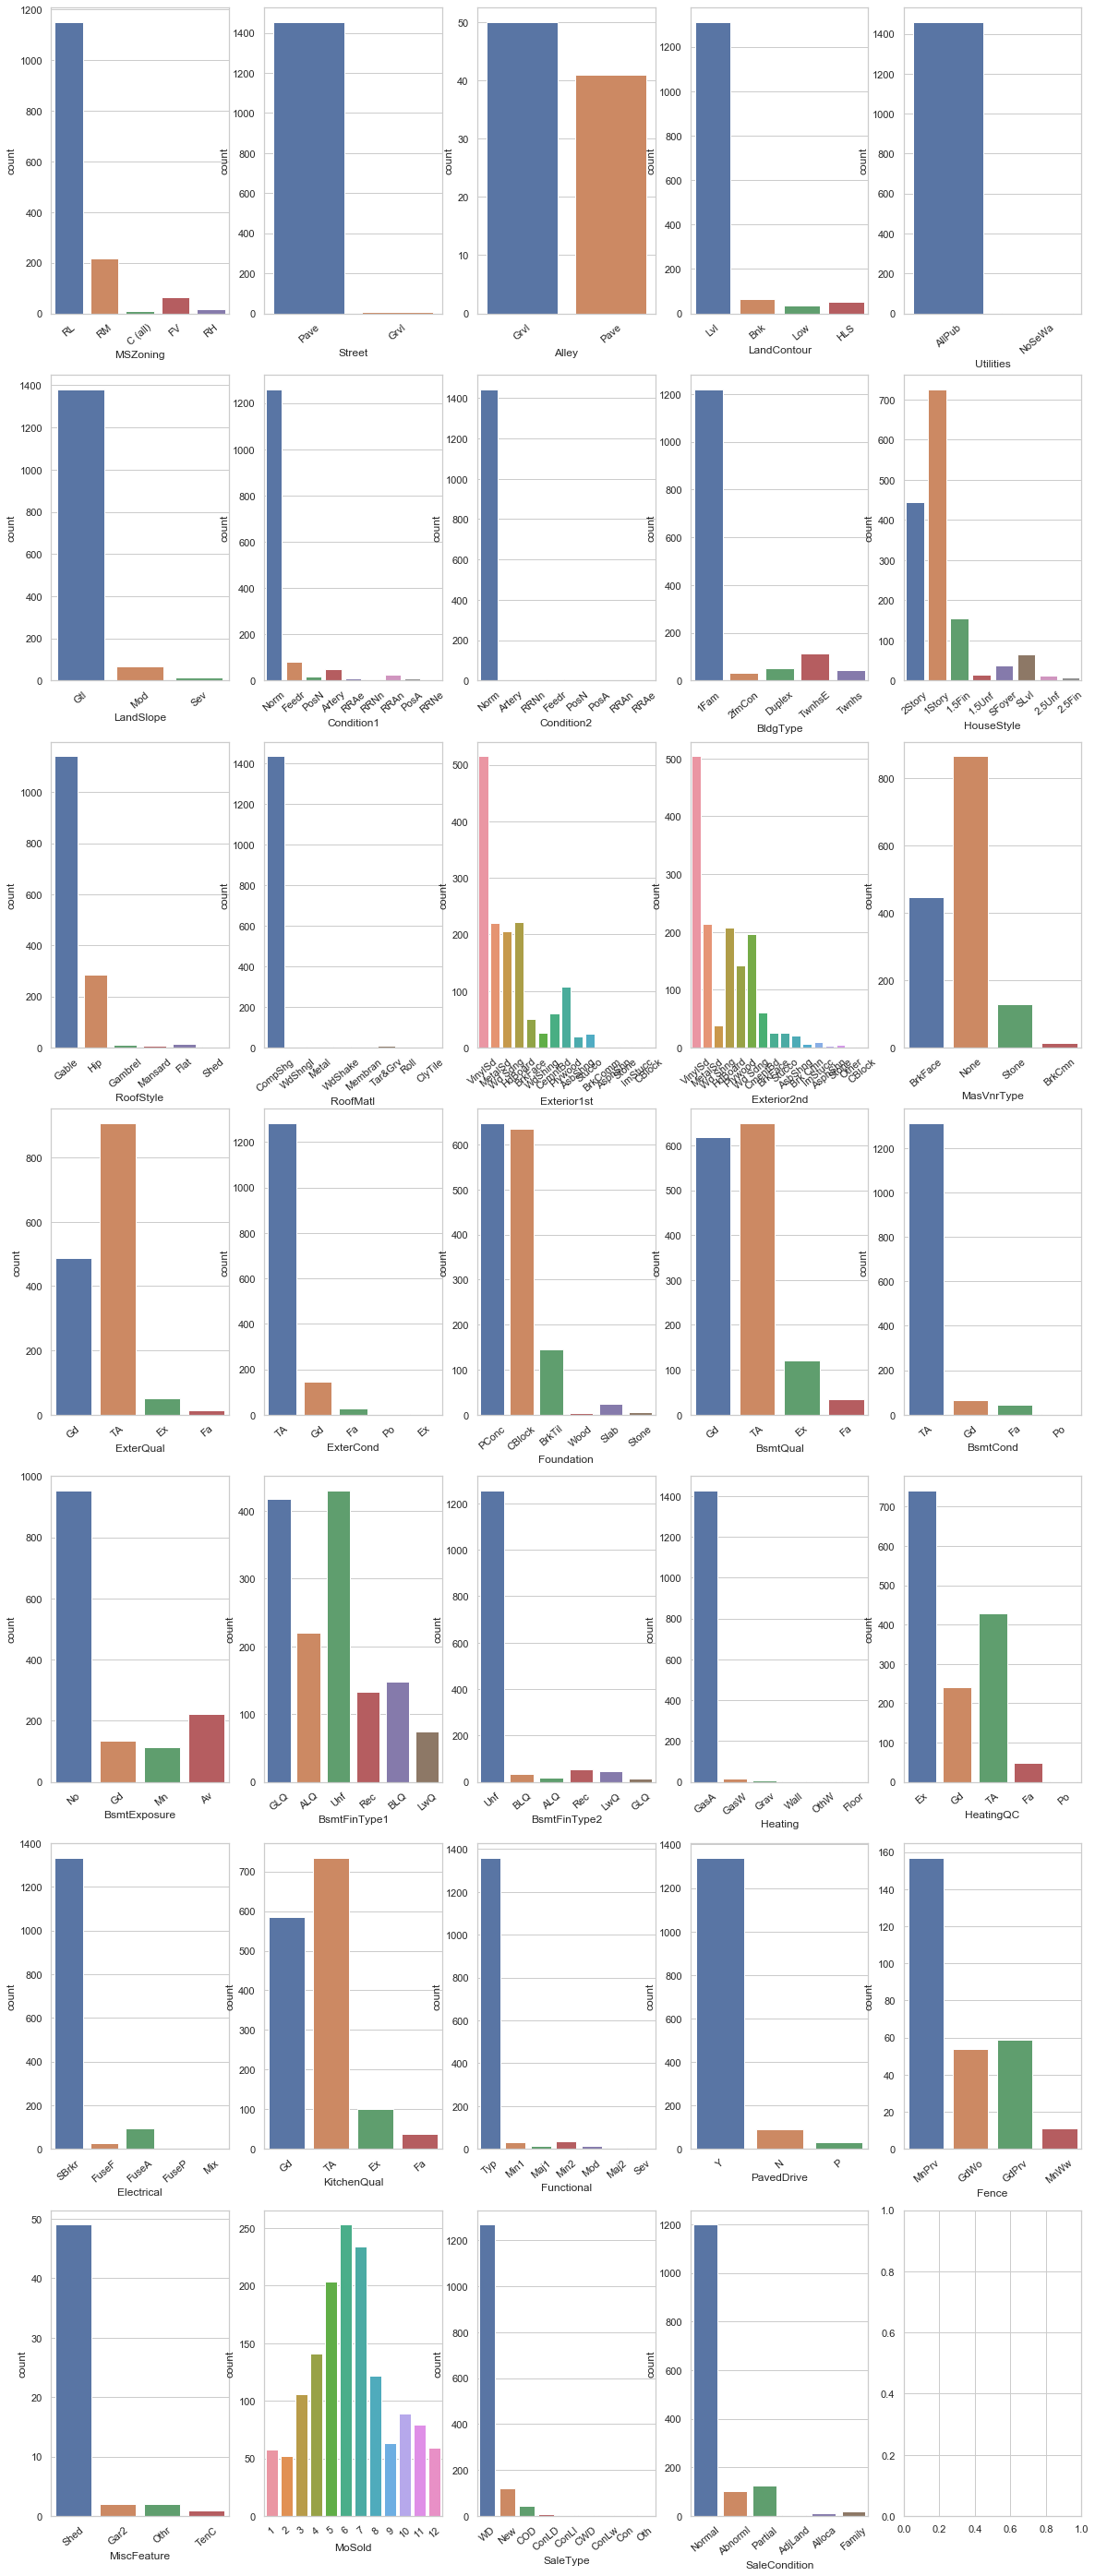

In [15]:
# Countplots of the categorical features from the list of critical factors
fig, ax = plt.subplots(7, 5, figsize=(20, 50))
for col, subplot in zip(cat_unimp_cols, ax.flatten()):
    sns.countplot(train[col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(40)

## Features with high correlation

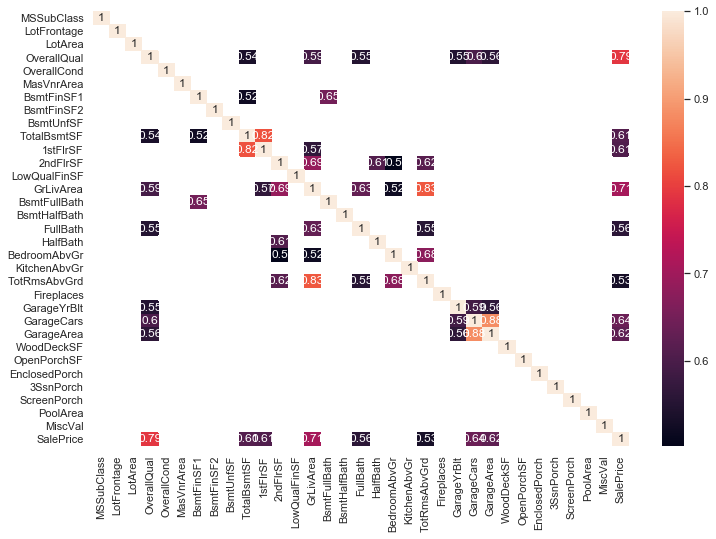

In [16]:
corr = train.corr()
sns.heatmap(corr[(corr > 0.5) | (corr < -0.5)], annot = True);

### Examine some of the features that are highly correlated with SalePrice

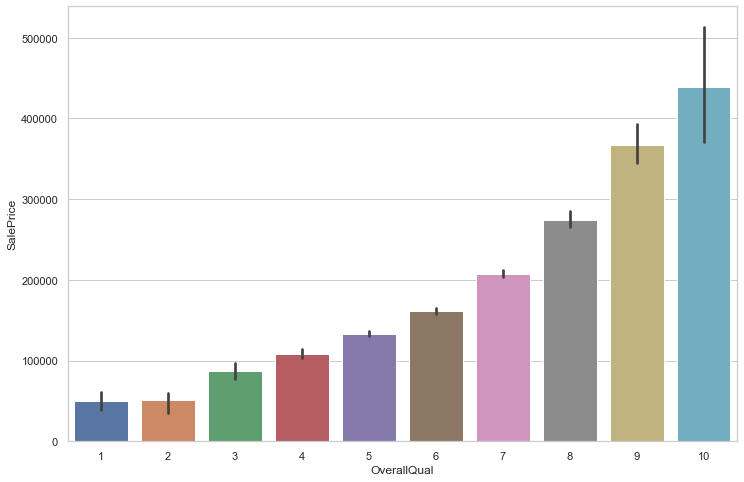

In [17]:
sns.barplot(data = train, x = "OverallQual", y = "SalePrice");

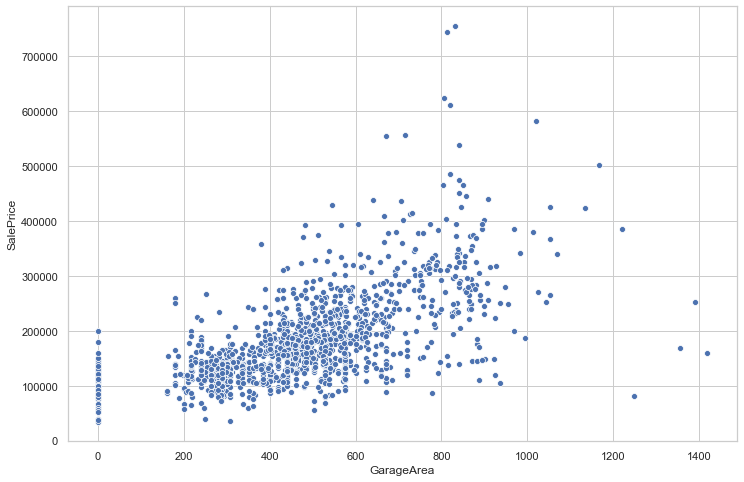

In [18]:
sns.scatterplot(data = train, x = "GarageArea", y = "SalePrice");

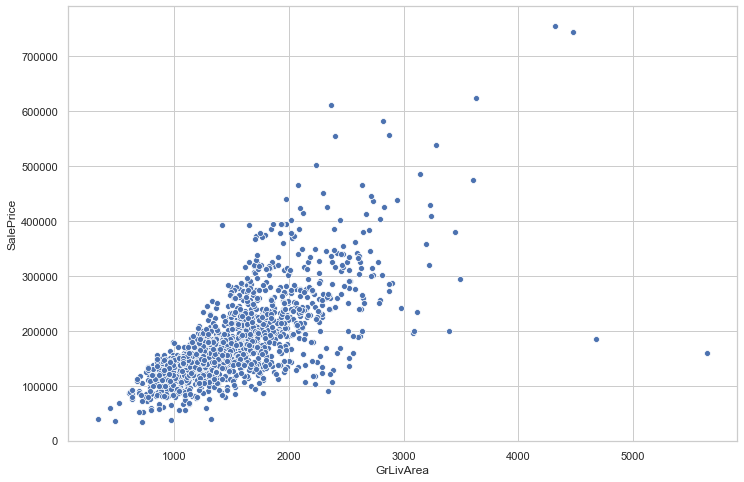

In [19]:
sns.scatterplot(data = train, x = "GrLivArea", y = "SalePrice");

### Count of missing values, which will be imputed in the feature engineering process

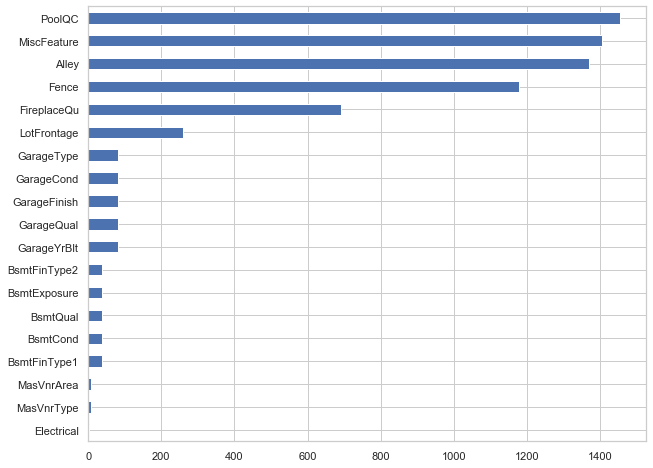

In [20]:
missing = pd.DataFrame(train.isna().sum().sort_values(), columns = ["Count_NaN"])
missing[missing["Count_NaN"] > 0].plot(kind= 'barh', figsize=(10,8),legend = None);